In [1]:
# This cell generates the fake data so we have something to look at.
from src.data_generator import DataGenerator as DG

# Each frame will be an X by Y array corresponding to a single frame from a heatmap.
# You'll prepare these from your data - this is just the raw numerical data that the
# heatmap is generated from.
N_FRAMES = 100
DIMS = (600, 300)

# Where the above-mentioned data is stored.
PATH_OUT = 'src/data/'

# This is size of our viewing window for the final visualization.
DIMS_DISPLAY = (400, 200)


# This generates the data
DG(n_frames=N_FRAMES,
   dimensions=DIMS,
   path_out=PATH_OUT
  );

Generating frame 100


---

The implementation below is specific to showing in a notebook.

All you need to use this elsewhere (Streamlit, Dash, etc.) is to write a function that provides a ScrollableHeatmap object with x,y, and t.

In [2]:
import matplotlib.pyplot as plt
from ipywidgets import interactive
from src.scrollable_heatmap import ScrollableHeatmap as SH
%matplotlib inline

# Instantiate a ScrollableHeatmap
sh = SH()


# Define how we'll display the output from the SH
def heatmap(x: int=0,
            y: int=0,
            t: int=0
           ):

    #========================================================================
    # An even faster way to do things like this is to 
    # not create a new figure each time, but update the data
    # in the existing figure. However, this might be complicated
    # by the interface you are using (e.g, Streamlit, Dash, PyQt, etc.)
    #
    # For a single heatmap that's not a gazillion pixels it *shouldn't* be a big deal.
    #
    fig, ax = plt.subplots(figsize=(3,6))
    #
    #========================================================================

    w = DIMS_DISPLAY[1]
    h = DIMS_DISPLAY[0]
    
    # Get the data
    frame = sh.get_subset(x,y,w,h,t)
    
    # Show the data
    ax.imshow(frame, cmap='inferno')
    return fig, ax

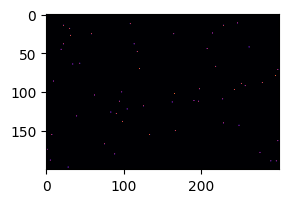

interactive(children=(IntSlider(value=0, description='x'), IntSlider(value=0, description='y', max=200), IntSl…

In [3]:
hm = interactive(heatmap, 
                 x=(0, DIMS[1]-DIMS_DISPLAY[1], 1), 
                 y=(0, DIMS[0]-DIMS_DISPLAY[0], 1),
                 t=(0, N_FRAMES-1, 1)
                )
hm